<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Выводы-и-рекомендации-по-работе-с-клиентами-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации по работе с клиентами</a></span><ul class="toc-item"><li><span><a href="#Чек-лист-доработок" data-toc-modified-id="Чек-лист-доработок-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Чек-лист доработок</a></span></li></ul></li></ul></div>

# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Задача — провести анализ и подготовить план действий по удержанию клиентов.

## Описание данных

Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Прочитаю файл с данными и изучу информацию в нем.

In [2]:
gym_churn = pd.read_csv('/datasets/ecommerce_daa.csv')

In [3]:
gym_churn.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
gym_churn.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

Преобразую названия столбцов переводом на нижний регистр.

In [5]:
gym_churn.columns = [i.lower() for i in gym_churn]

In [6]:
gym_churn.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [7]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Выведу уникальные значения бинарных переменных, чтобы проверить, нет ли ошибок в данных.

In [8]:
list_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']
for i in list_columns:
    print(i)
    print(gym_churn[i].unique())

gender
[1 0]
near_location
[1 0]
partner
[1 0]
promo_friends
[1 0]
phone
[0 1]
group_visits
[1 0]
churn
[0 1]


Итоги:

Датафрейм состоит из 14 полей - 13 признаков и 1 целевая переменная. Всего 4000 наблюдений. Все признаки численные, что хорошо. Целевая переменная не имеет временной структуры. Пропусков нет. Признаки - Пол, Локация, Партнерство, Факт прихода от друга, Наличие телефона, Факт посещения групповых занятий и целевая переменная являются бинарными.

## Исследовательский анализ данных (EDA)

Посмотрю на распределение переменных. Оценю их средние значения и стандартные отклонения.

In [9]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


В данных наблюдениях мужчин/женщин почти 50/50. Средний возраст клиентов - 29 лет, варьируется от 18 до 41. 84% клиентов проживают в районе, где находится финтес-центр. Почти половина клиентов являются сотрудниками компании-партнёра клуба. 30% клиентов пришли по рекомендации друзей. 10% не указали контактный номер телефона.

Теперь посмотрю на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [10]:
gym_churn_group = gym_churn.groupby('churn').agg('mean')
gym_churn_group.T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Построю столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

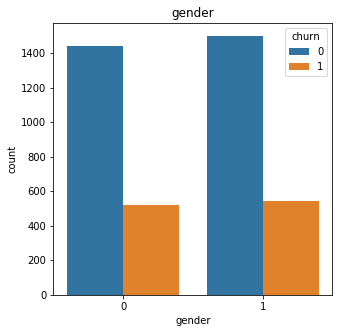

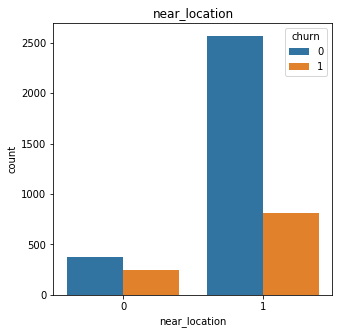

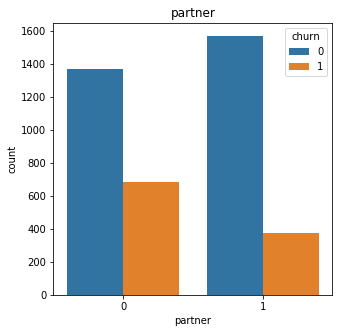

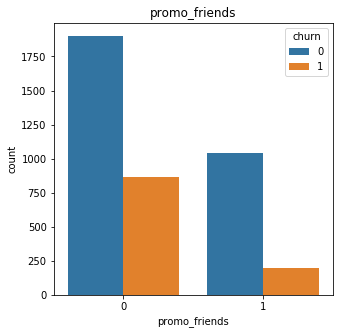

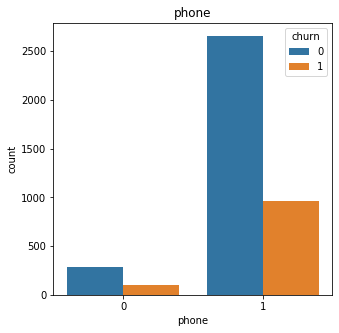

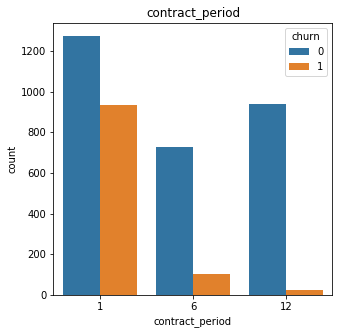

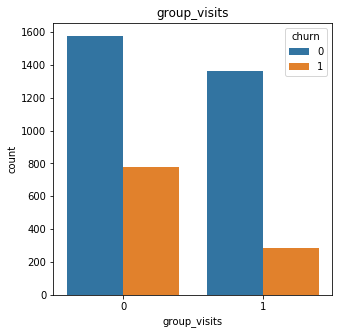

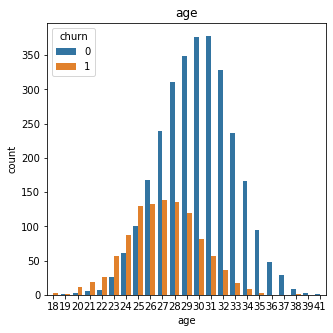

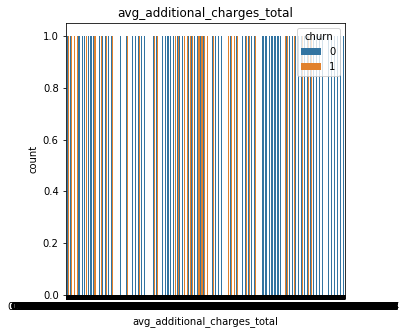

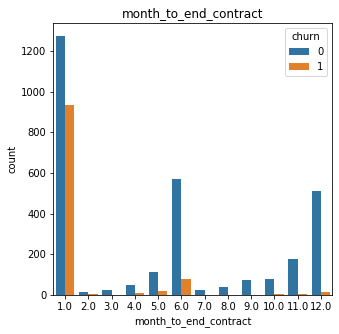

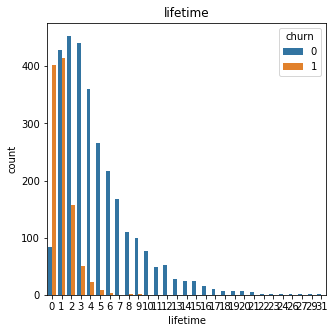

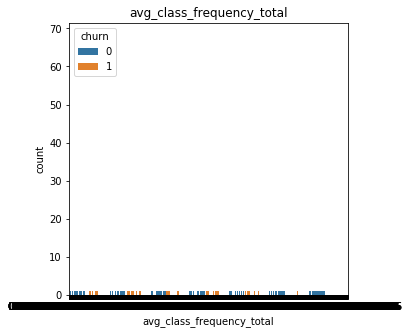

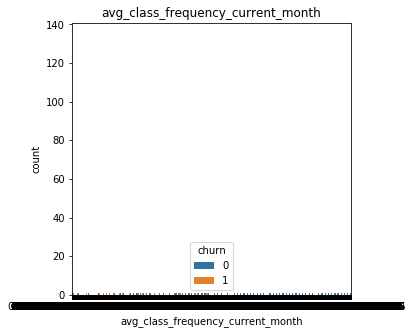

In [11]:
for i in gym_churn.columns.drop('churn'):
    plt.figure(figsize=(5, 5))
    sns.countplot(x = gym_churn[i], hue='churn', data=gym_churn)
    plt.title(i)
    plt.show()

По графикам распределения можно сделать следующие выводы по признакам:

- Пол не влияет на факт оттока, так как в изначально имеющихся наблюдениях мужчин/женщин 50/50 и ушедшие/оставшиеся тоже распределились 50/50.
- Доля тех, кто ушел выше у тех, кто проживает или работает в другом районе.
- Аналогично с партнерством - доля ушедших выше у тех, кто не является партнером.
- Реже уходят те, кто пришел по рекомендации от друзей.
- Наличие контактного телефона не влияет на факт оттока, доли распределены равнозначно.
- Длительность абонемента конечно же влияет на удержание - редко уходят те, кто приобрел абонемент на 12 или 6 месяцев (хотя и такие есть).
- Посещение групповых занятий тоже существенно задерживает клиентов - вероятно это мотивирует и добавляет интерес от работы в команде.
- Чем старше клиент, тем меньше вероятности, что уйдет. Видимо более взрослые относятся к себе более ответственно и обладают самодисциплиной.
- Когда срок до окончания абонемента месяц, вероятность, что клиент покинет клуб, растет.
- Решение, продолжать посещать клуб или нет, обычно клиент принимает в первые 2 месяца сотрудничества.

Теперь построю матрицу корреляций и посмотрю на наличие зависимостей между признаками и целевой переменной.

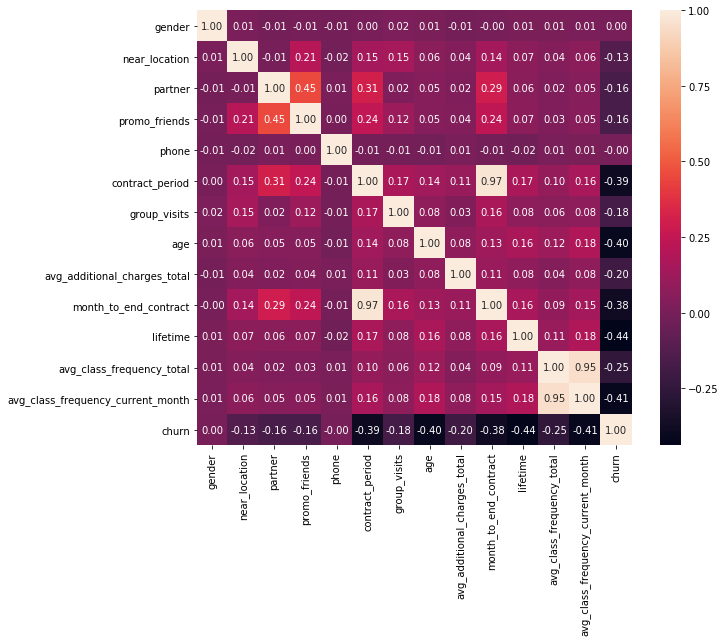

In [12]:
cm = gym_churn.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True, fmt = '0.2f', square=True)
plt.show()

По тепловой карте корреляций вижу мультиколлинеарные признаки 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month', а также 'Contract_period' и 'Month_to_end_contract', что достаточно очевидно. Сильных зависимостей целевой переменной от каких-либо признаков не наблюдается. Но есть признаки с нулевой корреляцией - пол и наличие контактного телефона, что было уже замечено на гистограммах.

Избавлюсь от мультиколлинеарности, удалив из датафрейма по одному из зависимых признаков.

In [13]:
gym_churn.drop('avg_class_frequency_total', axis = 1, inplace = True)
gym_churn.drop('month_to_end_contract', axis = 1, inplace = True)

## Построение модели прогнозирования оттока клиентов

Разделю данные на признаки (матрица X) и целевую переменную (y).

In [14]:
X = gym_churn.drop('churn', axis=1)
y = gym_churn['churn']

Разделю модель на обучающую и валидационную выборки.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

Cоздам объект класса StandardScaler и применю его к обучающей выборке.

In [17]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

Применю стандартизацию к матрице признаков для тестовой выборки.

In [18]:
X_test_st = scaler.transform(X_test)

Задам алгоритм и обучу модель. Сделаю прогнозы и выведу метрики.

Логистическая регрессия:

In [19]:
model = LogisticRegression(random_state=0, solver='liblinear')
model.fit(X_train_st, y_train)
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

Accuracy: 0.92
Precision: 0.85
Recall: 0.84
F1: 0.84
ROC_AUC: 0.97


Случайный лес:

In [20]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

Accuracy: 0.91
Precision: 0.85
Recall: 0.77
F1: 0.84
ROC_AUC: 0.97


Обе модели прогнозируют 90% правильных ответов, опять же нет баланса классов. Логистическая регрессия показывает результаты лучше по метрике Recall, а Случайный лес по метрике Precision. F1-мера и метрика оценки качества равны, причем ROC_AUC=0,96, что говорит о хорошести моделей.

## Кластеризация клиентов

Отложу в сторону столбец с оттоком и проведу кластеризацию клиентов. Для этого стандартизирую данные, построю матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисую дендрограмму.

In [21]:
gym_churn_sс = gym_churn.drop(['churn'], axis=1)
gym_churn_columns_list = gym_churn_sс.columns
gym_churn_sс = StandardScaler().fit_transform(gym_churn_sс)
gym_churn_sс = pd.DataFrame(gym_churn_sс, columns = gym_churn_columns_list).astype('float64')

In [22]:
linked = linkage(gym_churn_sс, method = 'ward')

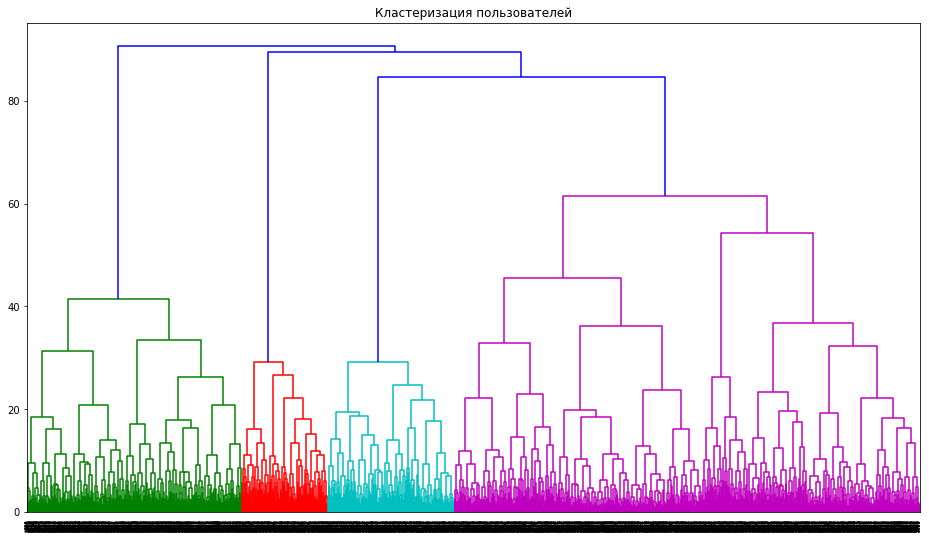

In [23]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

По полученной дендрограмме можно выделить 4 кластера. Но, следуя условию задания, обучу модель кластеризации на основании алгоритма K-Means и спрогнозирую кластеры клиентов, приняв число кластеров n=5.

In [24]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(gym_churn_sс)
gym_churn['cluster'] = labels

Посмотрю, как распределились кластеры по долям клиентов.

In [25]:
gym_churn.cluster.value_counts() / gym_churn.shape[0]

2    0.26600
3    0.25175
0    0.24625
1    0.13950
4    0.09650
Name: cluster, dtype: float64

Кластеры не равнозначны по доле клиентов. Кластеры 0, 2 и 3 близки по доле (около 25%), кластер 1 почти в 2 раза меньше (13%), кластер 4 содержит всего 9% клиентов.

Теперь посмотрю на средние значения признаков для кластеров. И построю гистограммы распределения признаков для кластеров.

In [26]:
gym_churn.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.496447,0.500000,0.500940,0.534260,0.523316
near_location,0.995939,0.000000,1.000000,0.996028,0.862694
partner,0.892386,0.489247,0.217105,0.379345,0.471503
promo_friends,1.000000,0.078853,0.072368,0.009930,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,6.922843,2.994624,2.010338,6.208540,4.777202
group_visits,0.524873,0.232975,0.277256,0.538232,0.427461
age,29.606091,28.679211,27.583647,30.699106,29.297927
avg_additional_charges_total,153.424651,137.125763,119.339956,176.259567,144.208179
lifetime,4.283249,2.974910,1.922932,5.415094,3.940415


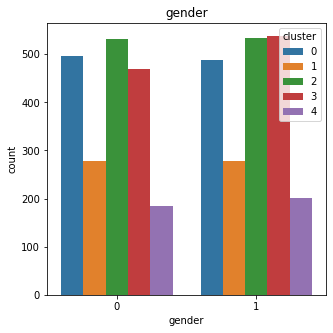

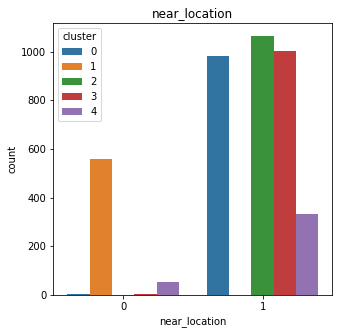

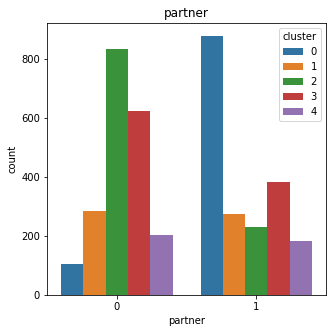

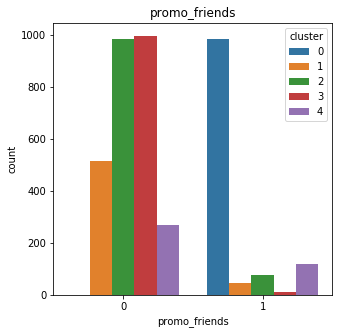

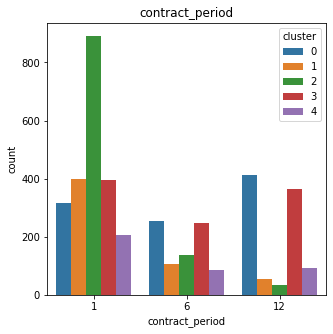

In [27]:
for i in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = gym_churn[i], hue='cluster', data=gym_churn)
    plt.title(i)
    plt.show()

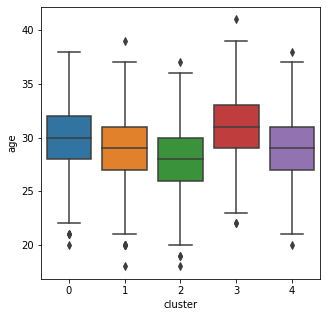

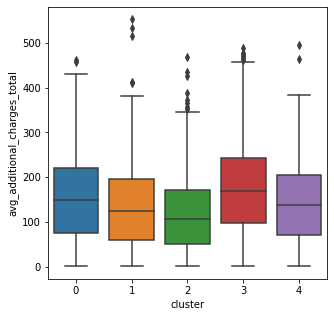

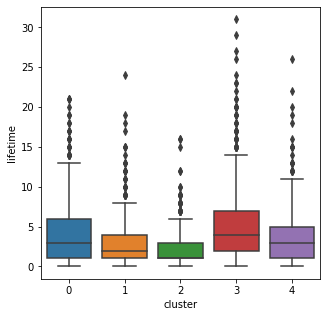

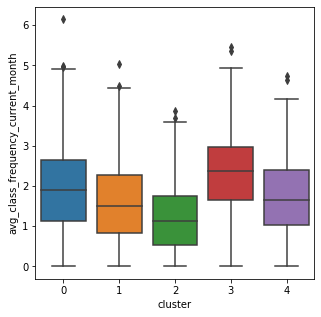

In [28]:
for i in ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = gym_churn[i], data = gym_churn)
    plt.show()

- Самый лояльный кластер 3 - наименьший процент оттока. Его характеризует время с момента первого посещения - "старички", возраст - более старшие клиенты, высокие расходы на дополнительные услуги, близость проживания к клубу и частота посещений.
- Также хорош кластер 0. Он близок по параметрам к кластеру 3, но выделяется еще признаками партнерства и 100% фактом прихода по рекомендации друзей.
- Самый большой отток в кластере 2. В нем наименьшая доля партнерства, маленький контрактный период и lifetime - "новички".
- Кластер 4 характеризуют клиенты, не указавшие контактный номер телефона.
- Кластер 1 характеризуют клиенты, не проживающие в одном районе с клубом.

## Выводы и рекомендации по работе с клиентами

В результате проведенного анализа можно сделать следующие выводы:

- Пол не влияет на факт оттока, так как в изначально имеющихся наблюдениях мужчин/женщин 50/50 и ушедшие/оставшиеся тоже распределились 50/50.
- Доля тех, кто ушел выше у тех, кто проживает или работает в другом районе.
- Аналогично с партнерством - доля ушедших выше у тех, кто не является партнером.
- Реже уходят те, кто пришел по рекомендации от друзей.
- Наличие контактного телефона не влияет на факт оттока, доли распределены равнозначно.
- Длительность абонемента конечно же влияет на удержание - редко уходят те, кто приобрел абонемент на 12 или 6 месяцев (хотя и такие есть).
- Посещение групповых занятий тоже существенно задерживает клиентов - вероятно это мотивирует и добавляет интерес от работы в команде.
- Чем старше клиент, тем меньше вероятности, что уйдет. Видимо более взрослые относятся к себе более ответственно и обладают самодисциплиной.
- Когда срок до окончания абонемента месяц, вероятность, что клиент покинет клуб, растет.
- Решение, продолжать посещать клуб или нет, обычно клиент принимает в первые 2 месяца сотрудничества.

Модели прогнозируют 90% правильных ответов, опять же нет баланса классов. Логистическая регрессия показывает результаты лучше по метрике Recall, а Случайный лес по метрике Precision. F1-мера и метрика оценки качества равны, причем ROC_AUC=0,96, что говорит о хорошести моделей.

Результаты построения модели кластеризации (при заданном числе кластеров n=5):

Кластеры не равнозначны по доле клиентов. Кластеры 0, 2 и 3 близки по доле (около 25%), кластер 1 почти в 2 раза меньше (13%), кластер 4 содержит всего 9% клиентов.

- Самый лояльный кластер 3 - наименьший процент оттока. Его характеризует время с момента первого посещения - "старички", возраст - более старшие клиенты, высокие расходы на дополнительные услуги, близость проживания к клубу и частота посещений.
- Также хорош кластер 0. Он близок по параметрам к кластеру 3, но выделяется еще признаками партнерства и 100% фактом прихода по рекомендации друзей.
- Самый большой отток в кластере 2. В нем наименьшая доля партнерства, маленький контрактный период и lifetime - "новички".
- Кластер 4 характеризуют клиенты, не указавшие контактный номер телефона.
- Кластер 1 характеризуют клиенты, не проживающие в одном районе с клубом.

По итогу целесообразно рекомендовать:

- Поддерживать и мотивировать кластеры с низким оттоком.
- Для привлечения новых клиентов использовать знания о клиентах из кластеров с низким оттоком и грамотно настраивать рекламу на эту аудиторию.
- Сегментировать уходящих, тем самым делать индивидуальные предложения.